<a href="https://colab.research.google.com/github/gopaljigupta45/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_GOPAL_JI_GUPTA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Loading and Preprocessing Data**

In [209]:
# Importing the libraries that we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
# Loading the data.
df = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation - GOPAL JI GUPTA/Online Retail.xlsx')

In [212]:
# Checking the data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [213]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [214]:
# Checking for shape and getting some information about the data.
print(df.shape)
df.info()

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [215]:
# getting some descriptive statistics for our numerical data.
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [216]:
# Preserving the data before we start operating in case we need the original data.
online_retail_df = df.copy()

In [217]:
# looking for missing/null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**As we can see that there are some null values in description column and quite a lot of null values in our CustomerId column. We need to deal with these null values otherwise they will have an adverse impact on our modelling process. And seeing as our goal is to customer segmentation, we can't just impute values for customerId. So we will have to drop these null values.**

In [218]:
# dropping the null values from our data.
df.dropna(inplace=True)

In [219]:
df.shape                    # new shape of the data.

(406829, 8)

In [220]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [221]:
# checking the datatypes of the features in our data.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [222]:
# now as we can see, that there are some columns that have the datatype object. we can modify them to the proper datatypes.
# changing customer id to and several string columns to str datatype.
df[['CustomerID']] = df[['CustomerID']].astype(int)
df[['InvoiceNo', 'StockCode', 'Description', 'Country']] = df[['InvoiceNo', 'StockCode', 'Description', 'Country']].astype(str)

In [223]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [224]:
# checking for duplicate data in our dataframe
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446,United Kingdom


**As we can see from above that there are over 5000 duplicate instances in our data. We will need to drop these instances.**

In [225]:
# Dropping the duplicate values.
df.drop_duplicates(inplace=True)

In [226]:
# checking the shape again.
df.shape

(401604, 8)

In [227]:
# Checking the number of unique values that our features contain.
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

## **EXPLORATORY DATA ANALYSIS**

### **Finding the top 10 countries which have the highest number of orders.**

In [228]:
# Checking the top 10 countries which have the highest number of orders.
df['Country'].value_counts().reset_index().head(10)

,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [229]:
# plotting the top 10 countries with the most orders using a countplot. First we need to store the above info into another dataframe.
country_df = df['Country'].value_counts().reset_index().head(10)

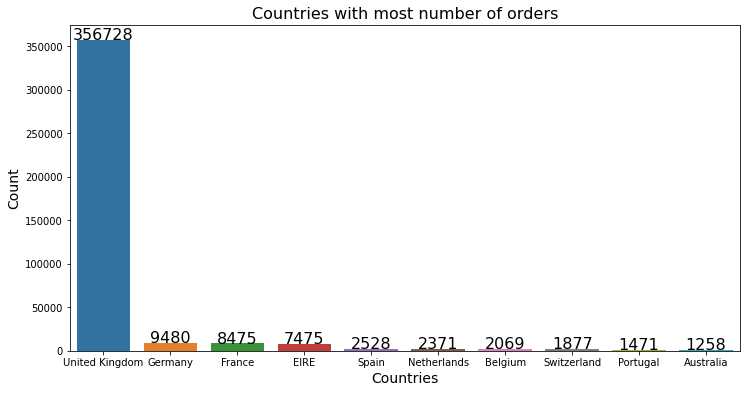

In [230]:
# Barplot of Top 10 countries with most no. of orders placed.
fig, ax = plt.subplots(figsize = (12,6))
graph = sns.barplot(x='index',y='Country',data=country_df.head(10))

# Setting the title and the x and y labels.
plt.title('Countries with most number of orders', fontsize = 16)
plt.xlabel('Countries', fontsize = 14 )
plt.ylabel('Count', fontsize = 14)

# Annotating (Putting the numbers) on top of each bar for better readability.
for p in graph.patches:                               
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2, height+500, '{:1.0f}'.format(height),ha = "center", fontsize = 16)

We can clearly see that most of the customers belong to the United Kingdom  which makes sense as it is the country where our business is based out of.

### **Lets find out which are our top 10 best selling products (by popularity).**
We are looking at the top products for whom the most customers placed orders. These products are most popular.

In [231]:
# Lets now see which products are the best sellers.
df['Description'].value_counts().reset_index()

,index,Description
0,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,REGENCY CAKESTAND 3 TIER,1894
2,JUMBO BAG RED RETROSPOT,1659
3,PARTY BUNTING,1409
4,ASSORTED COLOUR BIRD ORNAMENT,1405
...,...,...
3891,PINK/WHITE GLASS DEMI CHOKER,1
3892,I LOVE LONDON MINI RUCKSACK,1
3893,SET 36 COLOURING PENCILS DOILEY,1
3894,SET 12 COLOURING PENCILS DOILEY,1


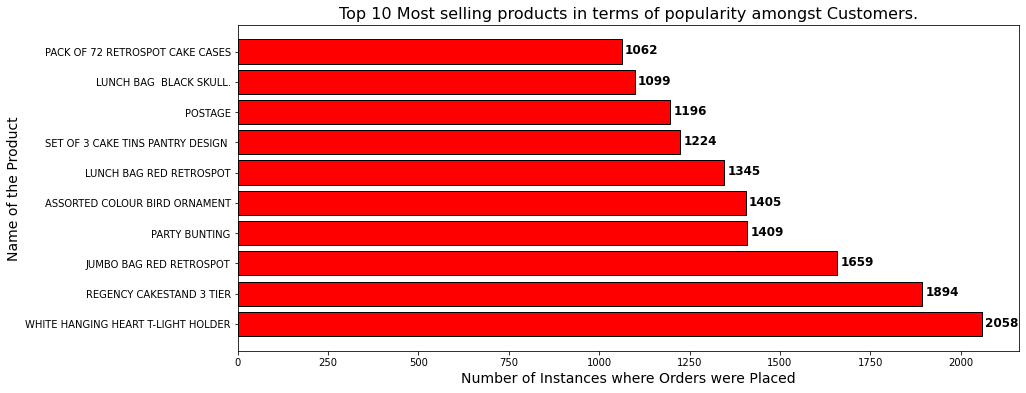

In [232]:
# Lets plot top 10 best selling products. we need to store the counts in another df for plotting this.
product_df = df['Description'].value_counts().reset_index().head(10)

# Now lets plot the top 10 best selling products using a horizontal bar chart.
fig, ax = plt.subplots(figsize = (14,6))
graph = plt.barh(product_df['index'],product_df['Description'], color='r', edgecolor='black')

# Setting the title and the x,y labels.
plt.title('Top 10 Most selling products in terms of popularity amongst Customers.', fontsize=16)
plt.xlabel('Number of Instances where Orders were Placed', fontsize=14)
plt.ylabel('Name of the Product', fontsize=14)

# Annotating each bar for better readability.
for p in graph.patches:
    width = p.get_width()
    plt.text(55+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.0f}'.format(width), ha='center', va='center', weight='bold', fontsize=12)

**From the above plot, we can see our best selling products in terms of popularity i.e. how many customers have placed orders for these items.**

## **Let's now find out our most selling products by quantity.**
Tthese products may or may not have been ordered by a lot of customers however, they were **most ordered** in terms of the **quantity**. 

In [233]:
# getting the most ordered items by volume. we use groupby on description and sum the quantities values for each unique description to get this data.
product_quantity_df = df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False).head(10)
product_quantity_df

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
1771,JUMBO BAG RED RETROSPOT,44963
217,ASSORTED COLOUR BIRD ORNAMENT,35215
3716,WHITE HANGING HEART T-LIGHT HOLDER,34128
2279,PACK OF 72 RETROSPOT CAKE CASES,33386
2612,POPCORN HOLDER,30492
2669,RABBIT NIGHT LIGHT,27045
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25305
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24129


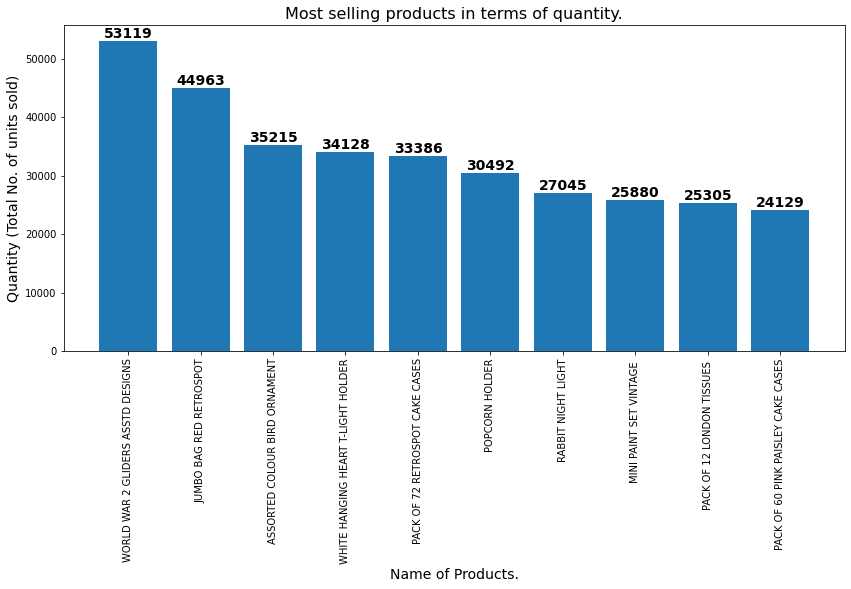

In [234]:
# Lets now plot this data.
fig, ax = plt.subplots(figsize = (14,6))
plots = plt.bar(product_quantity_df['Description'],product_quantity_df['Quantity'])
plt.xticks(rotation=90)

# creating a labels and values list for annotation.
labels = product_quantity_df['Description'].tolist()
values = product_quantity_df['Quantity'].tolist()

# Annotating each bar for better readability.
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(labels[i],values[i]), ha='center', va='bottom', fontsize=14, weight = 'bold')

# setting the title and x,y labels
plt.title('Most selling products in terms of quantity.', fontsize=16)
plt.ylabel('Quantity (Total No. of units sold)', fontsize=14)
plt.xlabel('Name of Products.', fontsize=14)
plt.show()

**We can see from the above graph the top 10 products that have the most amount of orders placed for them according to a quantity perspective.**

### **Now, lets look for which products have the most cancellations.**

In [235]:
# Let us now look at the number of canceled orders in the data. 
# The invoice no. for cancelled orders starts with C. We can use this to retrieve details about cancelled orders.

df[df["InvoiceNo"].str.startswith('C', na=False)]         # here we use boolean indexing to get only those instances whose invoice no. starts with C.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


We can clearly see that there are some 8872 instances of cancellation of orders. 

In [236]:
# storing this data in another df for further exploration of cancellations. 
cancellation_df = df[df["InvoiceNo"].str.startswith('C', na=False)]

In [237]:
# lets look at which product has the most number of cancellations.
product_cancellation_data = cancellation_df['Description'].value_counts().reset_index().head(10)
product_cancellation_data

,index,Description
0,REGENCY CAKESTAND 3 TIER,180
1,Manual,175
2,POSTAGE,97
3,JAM MAKING SET WITH JARS,86
4,Discount,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,72
6,STRAWBERRY CERAMIC TRINKET BOX,54
7,ROSES REGENCY TEACUP AND SAUCER,53
8,RECIPE BOX PANTRY YELLOW DESIGN,47
9,JUMBO BAG RED RETROSPOT,44


Text(0.5, 1.0, 'Top 10 Products with most number of cancellations.')

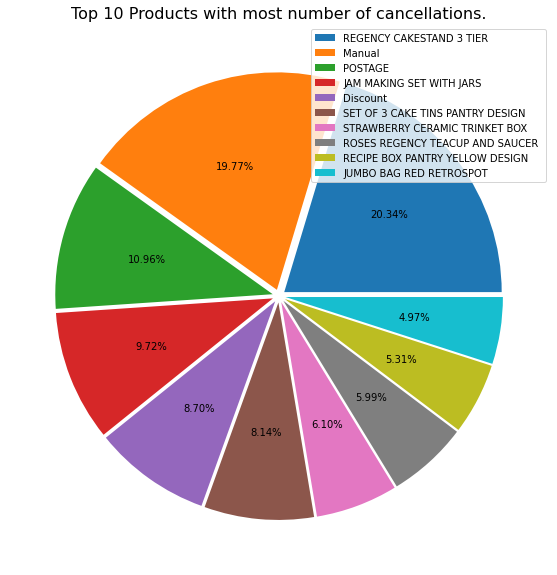

In [238]:
# Plotting the no. of cancellations for products using a pie chart.
plt.figure(figsize=(10,10))
labels=product_cancellation_data['index']                                                    # defining the labels.

explode=[0.03]*len(product_cancellation_data.index)                                          # setting values for exploding a wedge in the chart.
plt.pie(product_cancellation_data['Description'],explode = explode ,autopct='%1.2f%%')       # plotting the pie chart.
plt.legend(labels, loc='best')                                                               # setting the legends.

# Setting the title.
plt.title('Top 10 Products with most number of cancellations.', fontsize=16)

**Above chart depicts the number of cancellations via product. We can clearly see from the above chart that Regency Cakestand Tier 3 and Manual are the most cancelled products.**

### **Now, lets look at the cancellations per country.**

In [239]:
# We can use groupby on the country column and use count method to get cancellations per country.
# also we can use sort values to rank the data in descending order and then apply head method to get top 10 values.
country_cancel_df = cancellation_df.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo', ascending=False).head(10)
country_cancel_df

,Country,InvoiceNo
27,United Kingdom,7501
11,Germany,453
7,EIRE,247
10,France,148
26,USA,112
0,Australia,74
23,Spain,48
14,Italy,45
2,Belgium,38
15,Japan,37


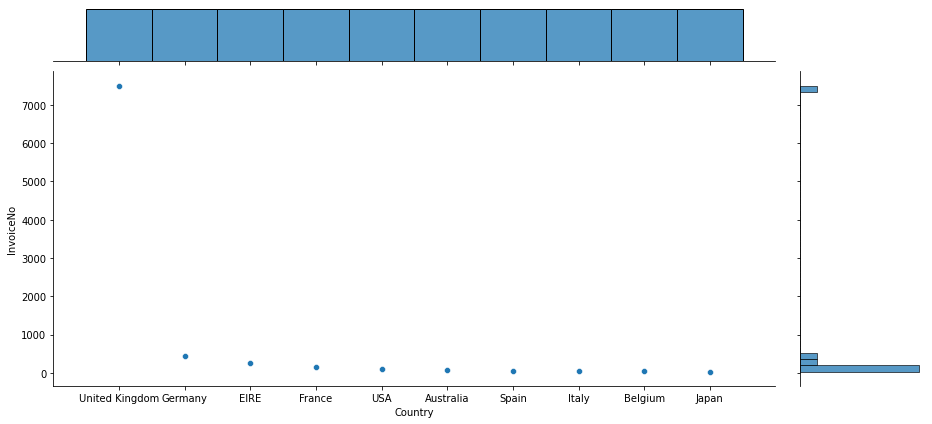

In [240]:
# Plotting the no. of canceled orders per country. we use a jointplot for this.
grid = sns.jointplot(country_cancel_df['Country'],country_cancel_df['InvoiceNo'])

# setting the figwidth figheight to get a non square jointplot to improve readability.
grid.fig.set_figwidth(14)
grid.fig.set_figheight(6)
grid.savefig("filename.png", dpi=300)

**We can clearly see that most cancellations have been done by residents of United Kingdom followed by Germany and EIRE (Republic of Ireland).**

### **Taking a look at the Monthly sales data.**

In [241]:
# To look at the monthly sales data, first we need to create a separate month column out of date.
# Also lets create separate column for day, month, year etc. and also create columns that contain proper names of months and days.

df['Day_num'] = df['InvoiceDate'].dt.day
df['Month_num'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# creating columns that contain proper months and day names for better understanding.
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()       

# seeing the new data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,12,2010,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,12,2010,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,12,2010,December,Wednesday


In [242]:
# Looking at monthly sales data.
month_df = df['Month'].value_counts().reset_index()
month_df.head()

,index,Month
0,November,64232
1,October,49928
2,December,43736
3,September,40459
4,May,28661


In [243]:
# As we can see from above, the months are not ordered. So lets order them before plotting the above data.
# Initialize an ordered months list.
ordered_months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# We can use categorical index function for ordering our data using the above list as a reference point.
month_df.index = pd.CategoricalIndex(month_df['index'],categories=ordered_months_list,ordered=True)
month_df = month_df.sort_index().reset_index(drop=True)
month_df

,index,Month
0,January,21670
1,February,20138
2,March,27516
3,April,22988
4,May,28661
5,June,27576
6,July,27256
7,August,27444
8,September,40459
9,October,49928


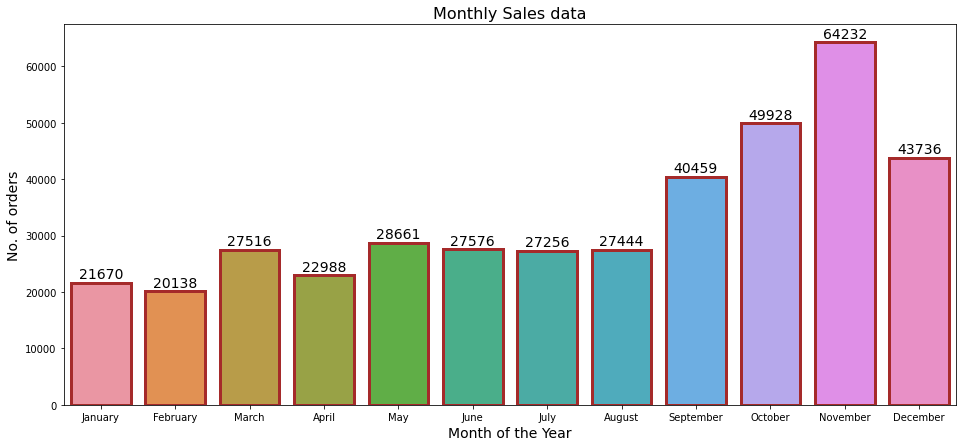

In [244]:
# Plotting the monthly sales data using a barplot.
fig, ax = plt.subplots(figsize = (16,7))
sns.barplot(month_df['index'],month_df['Month'], edgecolor='brown',lw=3)

# Setting the title and the x,y labels.
plt.title('Monthly Sales data', fontsize= 16)
plt.xlabel('Month of the Year', fontsize=14)
plt.ylabel('No. of orders', fontsize=14)

# Annotating the bars with the numbers they represent.
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.0f}'.format(height),ha = "center", fontsize=14)

**We can clearly say from the above graph that the winter months have the highest sales with November and October having the highest and second highest sales respectively.**

### **Taking a look at day wise order placement trend**

In [245]:
# Taking a look at the daily data.
day_df = pd.DataFrame(df['Day'].value_counts().reset_index())
day_df

,index,Day
0,Thursday,81575
1,Wednesday,69753
2,Tuesday,67376
3,Monday,65715
4,Sunday,61673
5,Friday,55512


In [246]:
# As we can see from above, the months are not ordered. So lets order them before plotting the above data.
# Initialize an ordered days name list.
ordered_day_name_list = ["Sunday", "Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday"]

# We can use categorical index function for ordering our data using the above list as a reference point.
day_df.index = pd.CategoricalIndex(day_df['index'],categories=ordered_day_name_list,ordered=True)
day_df = day_df.sort_index().reset_index(drop=True)
day_df

,index,Day
0,Sunday,61673
1,Monday,65715
2,Tuesday,67376
3,Wednesday,69753
4,Thursday,81575
5,Friday,55512


Text(0, 0.5, 'Number of orders placed')

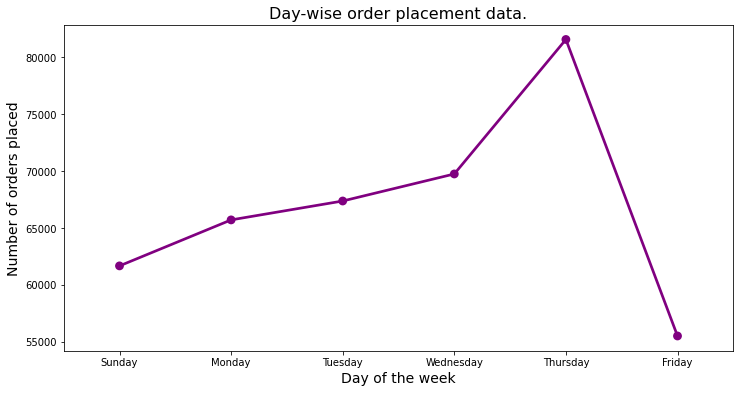

In [247]:
# Plotting this daily sales data.
plt.figure(figsize=(12,6))
sns.pointplot(day_df['index'], day_df['Day'], color='purple')

# Setting the title and x,y labels.
plt.title('Day-wise order placement data.', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of orders placed', fontsize=14)

**We can clearly see from the above graph that most orders were placed on Thursdays and there were no orders placed on Saturdays.**

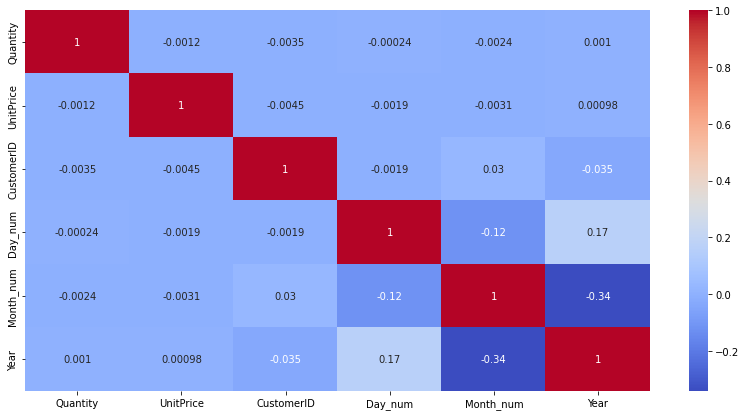

In [248]:
# Checking for correlation in our data.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Before we proceed further with our analysis, we need to consider that we need to drop those instances wherein cancellation happened as they are not that relevant to our analysis.

In [249]:
# Removing those instances that resulted in a calcellation.
df = df[~df['InvoiceNo'].str.contains('C')]

### **Performing a RFM analysis.**

**RFM stands for recency, frequency, monetary value. These parameters are usually used to give us an idea of who our best customers are and customers who we are at risk of losing.**

*   Recency: How recently has the customer made a transaction with us. **Recency = Latest Date - Last Inovice Data**
*   Frequency: How frequent is the customer in ordering/buying some product from us. **Frequency = count of invoice no. of transactions**
*   Monetary: How much does the customer spend on purchasing products from us. **Monetary = Sum of Total Amount for each customer**

RFM is a data-driven customer segmentation technique that allows marketers to take tactical decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with differentiated and personalized marketing strategies. This in turn improves user engagement and retention.In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. Then we divide the customer list into tiered groups for each of the three dimensions (R, F and M).

RFM factors illustrate these facts:

*   the more recent the purchase, the more responsive the customer is to promotions
*   the more frequently the customer buys, the more engaged and satisfied they are

*   monetary value differentiates heavy spenders from low-value purchasers

In [250]:
# As we can see from the above definition, to do monetary analysis , we need the total amount for each customer.
# Lets create a column amount using quantity and unitprice columns. Amount = Quantity * UnitPrice.
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [251]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [252]:
# Importing the datetime module.
import datetime as dt

# As last invoice date was 2011-12-09, setting Latest date to 2011-12-10 for calculating the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                     'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={  'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,18,73,1757.55
4,12350,310,17,334.40


Text(0.5, 0, 'Features')

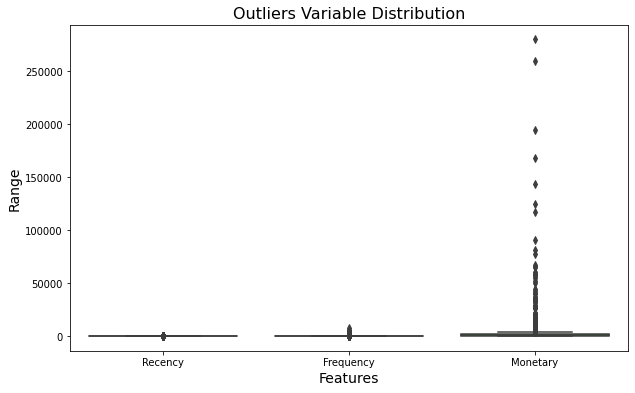

In [253]:
# Box plot of Recency, Frequency and Monetary
plt.figure(figsize=(10,6))
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", fontsize = 16)
plt.ylabel("Range", fontsize = 14)
plt.xlabel("Features", fontsize = 14)

We can clearly see that there are outliers in all three of our features. So we will use the IQR (Inter Quartile Range) method for their removal.

In [254]:
# Now removing these outliers.
# removing outliers from Recency column
Q1 = rfm_df['Recency'].quantile(0.05)
Q3 = rfm_df['Recency'].quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df [(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = rfm_df['Frequency'].quantile(0.05)
Q3 = rfm_df['Frequency'].quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

# outlier treatment for Monetary
Q1 = rfm_df['Monetary'].quantile(0.05)
Q3 = rfm_df['Monetary'].quantile(0.95)
IQR = Q3 - Q1
rfm_df  = rfm_df [(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Features')

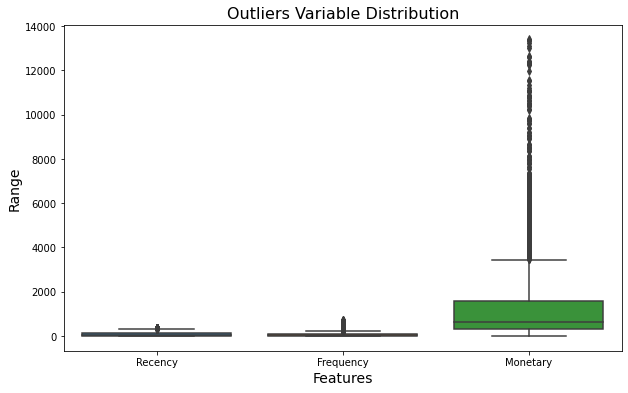

In [255]:
# Again plotting Box plot of Recency, Frequency and Monetary to see the difference.
plt.figure(figsize=(10,6))
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", fontsize = 16)
plt.ylabel("Range", fontsize = 14)
plt.xlabel("Features", fontsize = 14)

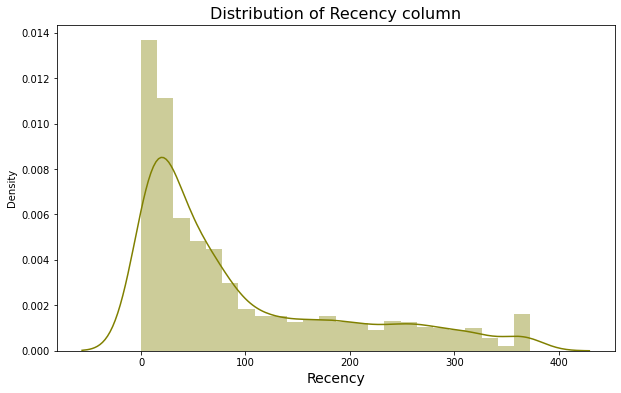

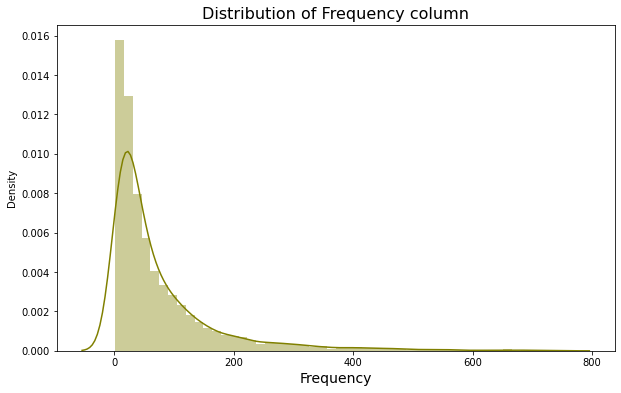

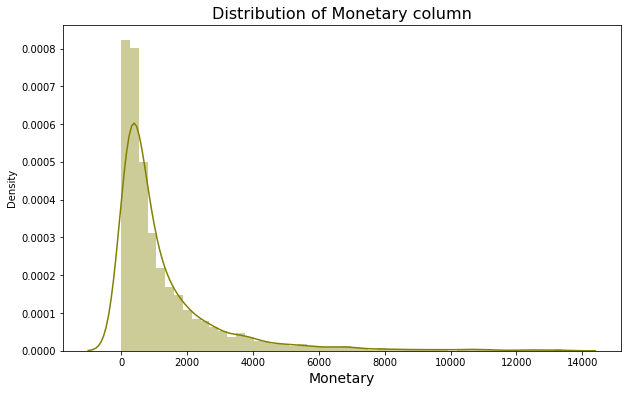

In [256]:
# Checking the distribution for our features - recency, frequency and monetary and excluding customer_id column.
for col in rfm_df.columns[:]:
  x = rfm_df[col]
  plt.figure(figsize=(10,6))
  sns.distplot(x, color = 'olive')
  plt.title(f'Distribution of {col} column', fontsize=16)
  plt.xlabel(col, fontsize=14)

**As we can see from above that all our features are positively skewed. So lets perform a log transform on them.**

In [257]:
# But before we can perform a log transformation, we need to take care of any negative or zero values in our recency or monetary columns as 
# log function is not defined for those values so we will write a function to assign any negative values to zero for transformation.
def non_zero_value_formatter(num):
    if num <= 0:
        return 1
    else:
        return num

In [258]:
# applyling the above function to our recency and monetary columns(frequency can't be zero or negative).
rfm_df['Recency'] = rfm_df['Recency'].apply(lambda x: non_zero_value_formatter(x))
rfm_df['Monetary'] = rfm_df['Monetary'].apply(lambda x: non_zero_value_formatter(x))

In [259]:
# Performing the log transform.
log_rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

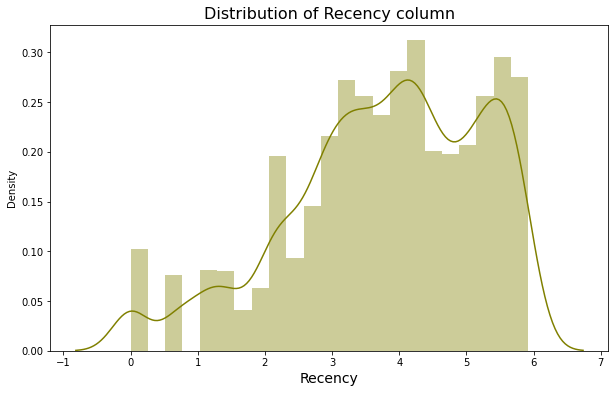

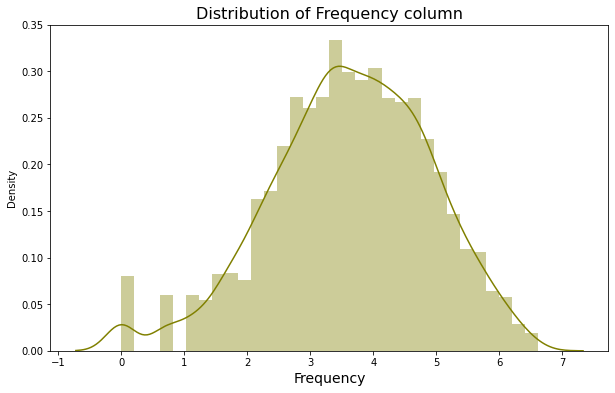

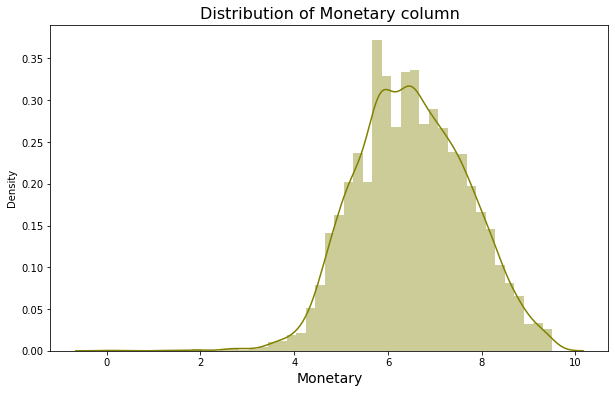

In [260]:
# Checking the distribution for our features - recency, frequency and monetary and excluding customer_id column.
for col in log_rfm_df.reset_index().columns[1:]:
  x = log_rfm_df[col]
  plt.figure(figsize=(10,6))
  sns.distplot(x, color = 'olive')
  plt.title(f'Distribution of {col} column', fontsize=16)
  plt.xlabel(col, fontsize=14)

**Now our data has a normal distribution.**

### **Splitting our data into segments using quantiles.**

In [261]:
# Lets split our data into four quantiles.
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 145.0},
 'Frequency': {0.25: 17.0, 0.5: 39.0, 0.75: 95.0},
 'Monetary': {0.25: 302.5775, 0.5: 651.745, 0.75: 1564.6025}}

In [262]:
# Functions to create R, F and M segments
# We want the customer who is frequent and a heavy spender and had made purchases recently. That is our ideal customer.
# We will pass the above quantiles dict and feature to write functions for this task.
def recency_score(x,feature,quantile_dict):                                    # 1 is best and 4 is worst recency score
    if x <= quantile_dict[feature][0.25]:
        return 1
    elif x <= quantile_dict[feature][0.50]:
        return 2
    elif x <= quantile_dict[feature][0.75]: 
        return 3
    else:
        return 4
    
def freq_mon_value_score(x,feature,quantile_dict):                                 # 4 is worst and 1 is best frequency and monetary score
    if x <= quantile_dict[feature][0.25]:
        return 4
    elif x <= quantile_dict[feature][0.50]:
        return 3
    elif x <= quantile_dict[feature][0.75]: 
        return 2
    else:
        return 1

In [263]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(recency_score, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(freq_mon_value_score, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(freq_mon_value_score, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347,2,182,4310.00,1,1,1
12348,75,31,1797.24,3,3,1
12349,18,73,1757.55,1,2,1
12350,310,17,334.40,4,4,3
12352,36,85,2506.04,2,2,1


In [264]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12347,2,182,4310.00,1,1,1,111,3
12348,75,31,1797.24,3,3,1,331,7
12349,18,73,1757.55,1,2,1,121,4
12350,310,17,334.40,4,4,3,443,11
12352,36,85,2506.04,2,2,1,221,5


In [265]:
# Assign a ranking level to each customer.
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
# loyalty level is a measure of our customers rank with platinum being the best level and bronze as worst.

Score_cuts = pd.qcut(rfm_df.RFMScore, q =4, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12347,2,182,4310.00,1,1,1,111,3,Platinum
1,12348,75,31,1797.24,3,3,1,331,7,Gold
2,12349,18,73,1757.55,1,2,1,121,4,Platinum
3,12350,310,17,334.40,4,4,3,443,11,Bronze
4,12352,36,85,2506.04,2,2,1,221,5,Platinum


In [266]:
# RFMScore Loyalty_Level Platinum indicates that these customers are most valuable customers for us.
print(rfm_df[rfm_df['RFMScore']<= 5].sort_values('Monetary', ascending = False).reset_index().head(10))
rfm_df[rfm_df['RFMScore'] <= 5].shape

   CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0       12540       19        478  13400.24  2  1  1      211         4   
1       12433        1        420  13375.87  1  1  1      111         3   
2       15498        2        512  13316.40  1  1  1      111         3   
3       12477       22        300  13219.74  2  1  1      211         4   
4       17735        2        690  13110.02  1  1  1      111         3   
5       16525        2        183  13027.45  1  1  1      111         3   
6       14258        9        111  12669.98  1  1  1      111         3   
7       13078        3        358  12627.94  1  1  1      111         3   
8       12536       43        261  12601.83  2  1  1      211         4   
9       15640        4        476  12416.11  1  1  1      111         3   

  RFM_Loyalty_Level  
0          Platinum  
1          Platinum  
2          Platinum  
3          Platinum  
4          Platinum  
5          Platinum  
6          Platinum 

(1238, 9)

**As we can see we have around 1238 Platinum Level customers. These customers are frequent, high spenders who have placed orders recently.**

# **Modelling**

## **K Means Clustering**

In [267]:
# applying log transform to our features by using math.log
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

Now, before we proceed to implementing the models, we need to perform scaling on our features because K means clustering algorithm is a distance based algorithm and variables with really high or low magnitude can lead to bias and inefficiency in the model.

In [268]:
# importing standardscaler
from sklearn.preprocessing import StandardScaler

X = rfm_df[['Recency_log','Frequency_log','Monetary_log']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

### **K-Means Silhouette Analysis**

In [269]:
# importing the libraries and metrics and tools for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.39408103379054493
For n_clusters = 3 The average silhouette_score is : 0.29475936365115435
For n_clusters = 4 The average silhouette_score is : 0.2975051811313832
For n_clusters = 5 The average silhouette_score is : 0.28291048922517165
For n_clusters = 6 The average silhouette_score is : 0.2624852862941338
For n_clusters = 7 The average silhouette_score is : 0.2678763390373605
For n_clusters = 8 The average silhouette_score is : 0.2685289240195684


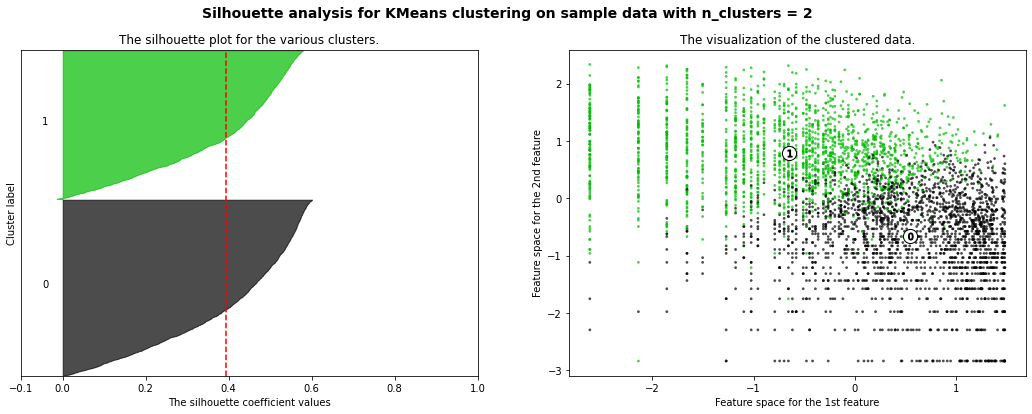

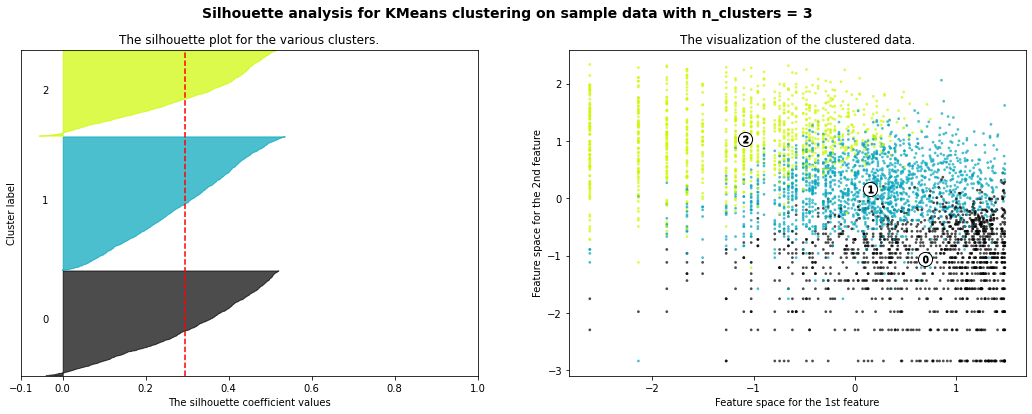

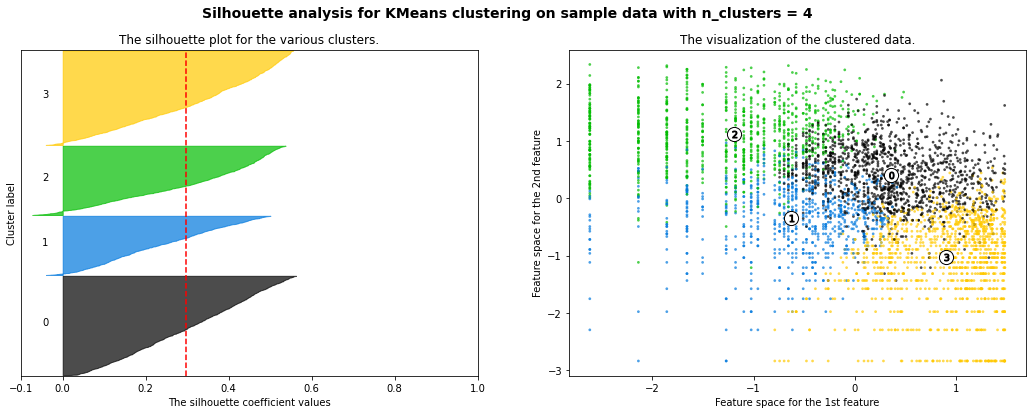

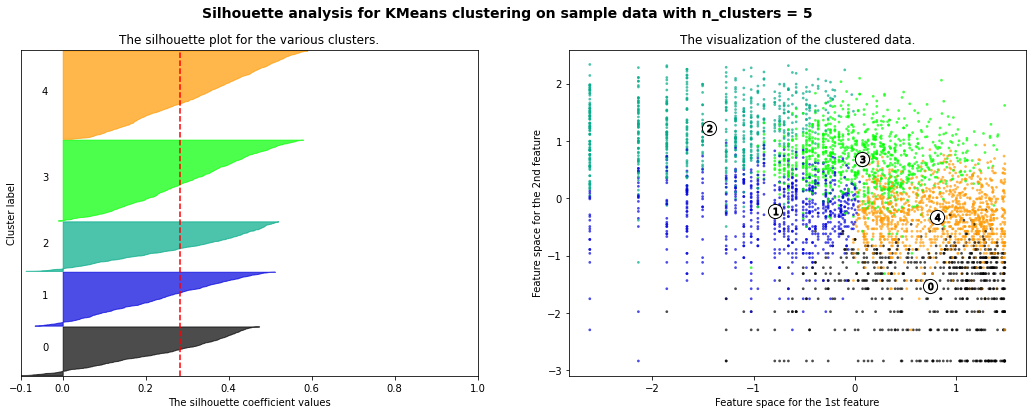

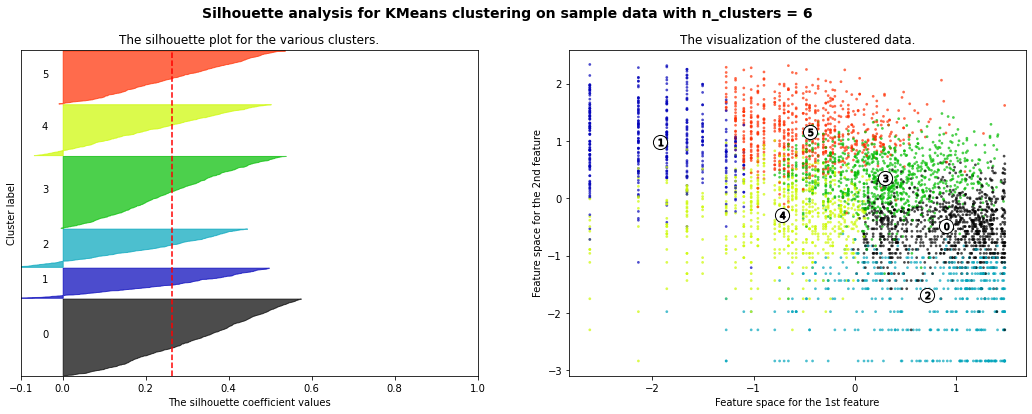

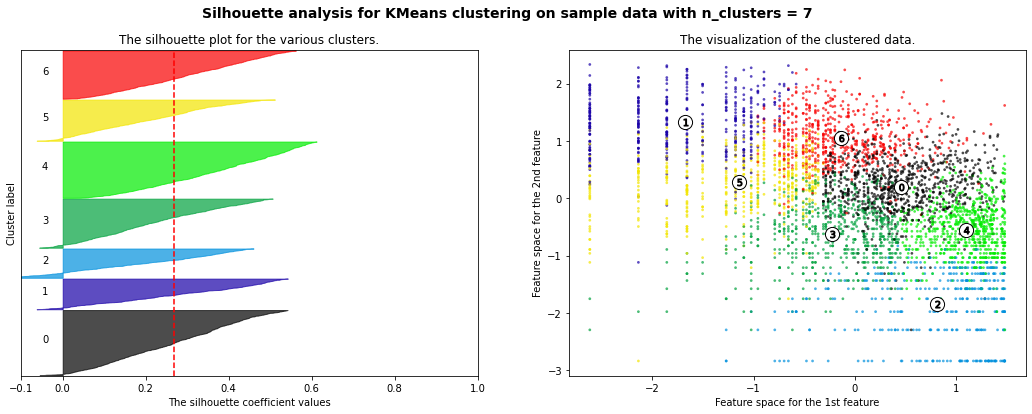

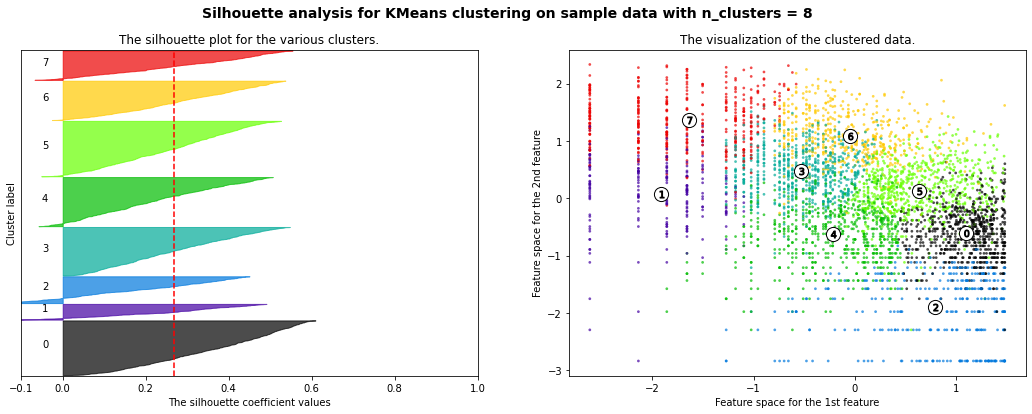

In [270]:
range_n_clusters = [2,3,4,5,6,7,8]                   # initialising several values of k to see which performs better.

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**We can see that silhouette score is highest when we choose 2 clusters. Hence, according to this model, the no. of optimal clusters is 2**

### **Applying Elbow Method on Recency ,Frequency and Monetary**

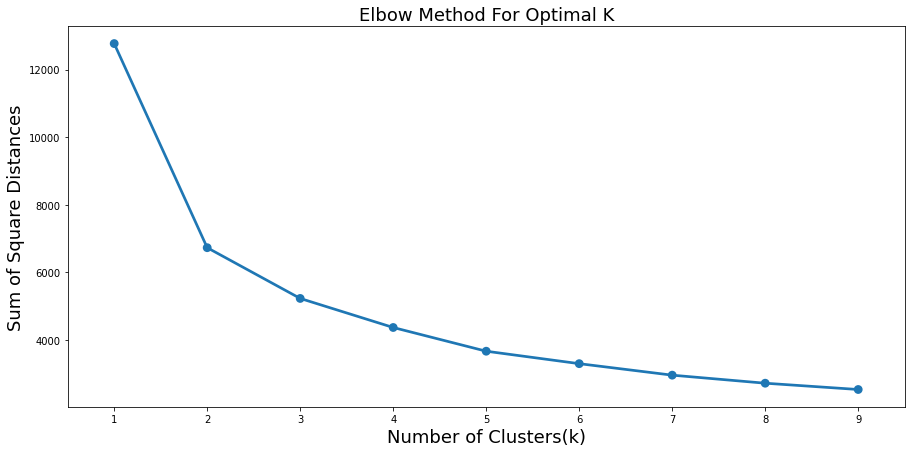

In [271]:
sum_of_square_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,7))
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()))
plt.xlabel('Number of Clusters(k)', SIZE = 18)
plt.ylabel('Sum of Square Distances', SIZE = 18)
plt.title('Elbow Method For Optimal K', SIZE = 18)
plt.show()

**From the above graph, we can see that the elbow is formed at value 2. So the optimal number of clusters according to this analysis is 2.**

In [272]:
# fitting the kmeans model with clusters = 2
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)
Y_pred_kmeans = kmeans_model.predict(X)

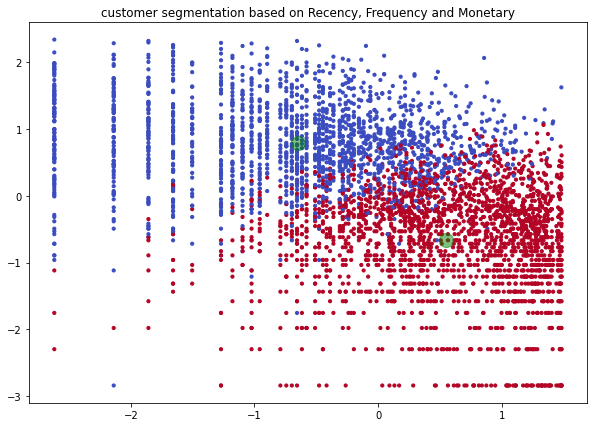

In [273]:
# scatter plot to show clusters
plt.figure(figsize=(10,7))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=Y_pred_kmeans, s=10, cmap='coolwarm')

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)

In [274]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)  # KMeans with 2 clusters
KMean_clust.fit(X)        # Fitting the model to the data

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,,
12347,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1
12348,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349,18,73,1757.55,1,2,1,121,4,Platinum,2.890372,4.290459,7.471676,1
12350,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,0
12352,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,1
12353,204,4,89.00,4,4,4,444,12,Bronze,5.318120,1.386294,4.488636,0
12354,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,0
12355,214,13,459.40,4,4,3,443,11,Bronze,5.365976,2.564949,6.129921,0
12356,22,59,2811.43,2,2,1,221,5,Platinum,3.091042,4.077537,7.941449,1


### **Cluster Profiling**

In [275]:
# Grouping by clusters to understand the profiles
rfm_df.groupby('Cluster').mean()

,Recency,Frequency,Monetary,R,F,M,RFMScore,Recency_log,Frequency_log,Monetary_log
Cluster,,,,,,,,,,
0,143.397919,23.230169,411.295502,3.100997,3.306459,3.277850,9.685306,4.569979,2.776353,5.724992
1,34.468958,137.711647,2367.090591,1.762955,1.574141,1.579271,4.916367,2.843619,4.633013,7.451969


Wholesale Customer: 'Cluster 0' is the high value customer segment as the customer in this group place the orders with high amount with a very high frequency than other members. So we assume that these are the wholesale customers of retail store.

Average Customer: 'Cluster 1' is the average customer segment.These customers order less frequently as compared to wholesale customer and their orders do not have a high amount. So these are our average customers.

In [276]:
# Number of customers belonging to each cluster
rfm_df['Cluster'].value_counts()

0    2307
1    1949
Name: Cluster, dtype: int64

### **Hierarchical Clustering**

AGGLOMERATIVE HIERARCHICAL CLUSTERING

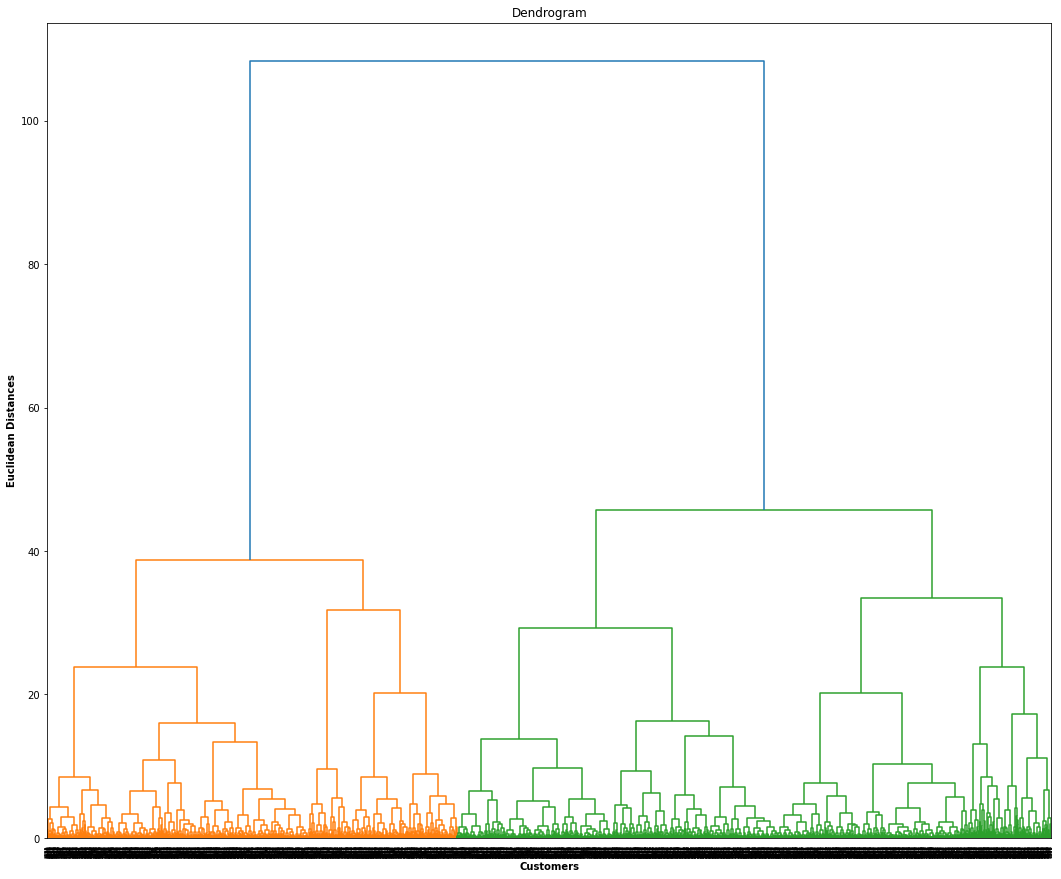

In [277]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize = (18,15))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.show() 

We can see from above dendogram, that our optimal number of clusters is 3. In dendogram, to choose a optimal value, we need to draw a horizontal line parallel to x-axis at a threshold which ideally cuts the longest vertical line. And in this case, we can see that our threshold should be just around and above 40 .

### **Setting threshold at 40.**

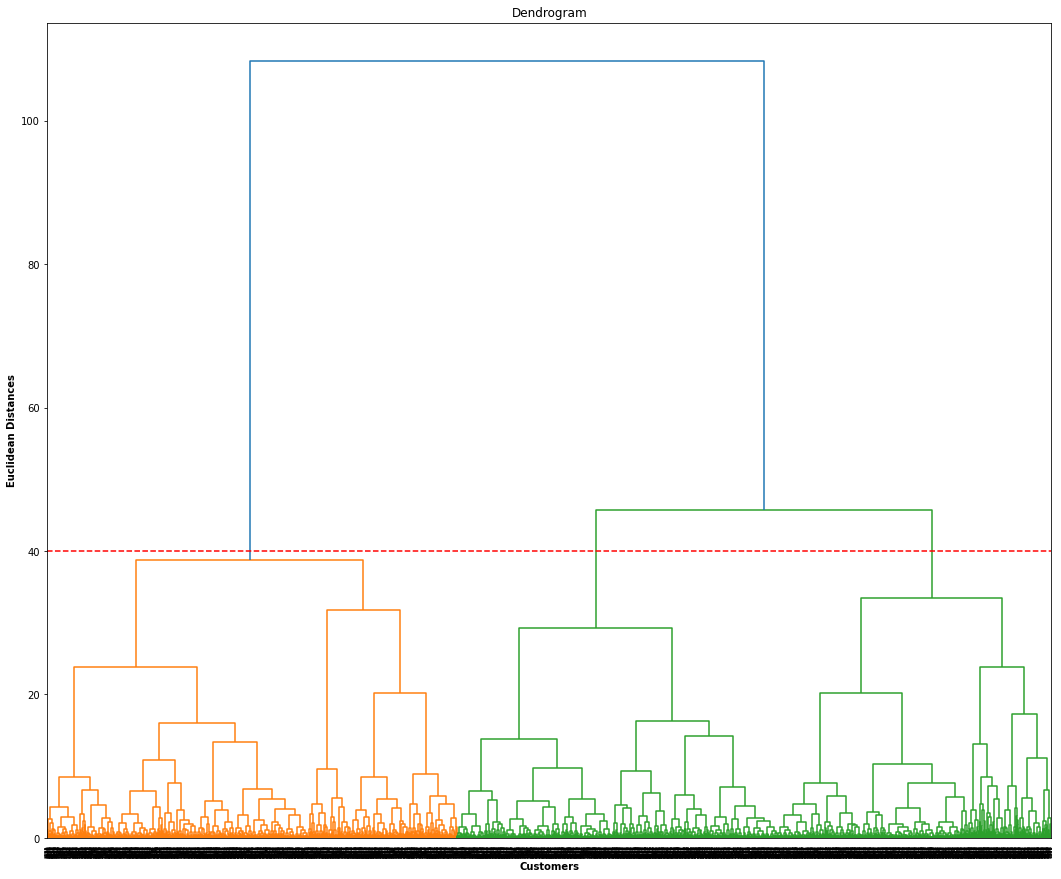

In [278]:
plt.figure(figsize = (18,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers',fontweight="bold")
plt.ylabel('Euclidean Distances',fontweight="bold")
plt.axhline(y=40, color='r', linestyle='--')
plt.show()

As we can see that we are able to keep our threshold at 40 and it gives us number of clusters = 3.

In [279]:
# Fitting hierarchical clustering to the online retail dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

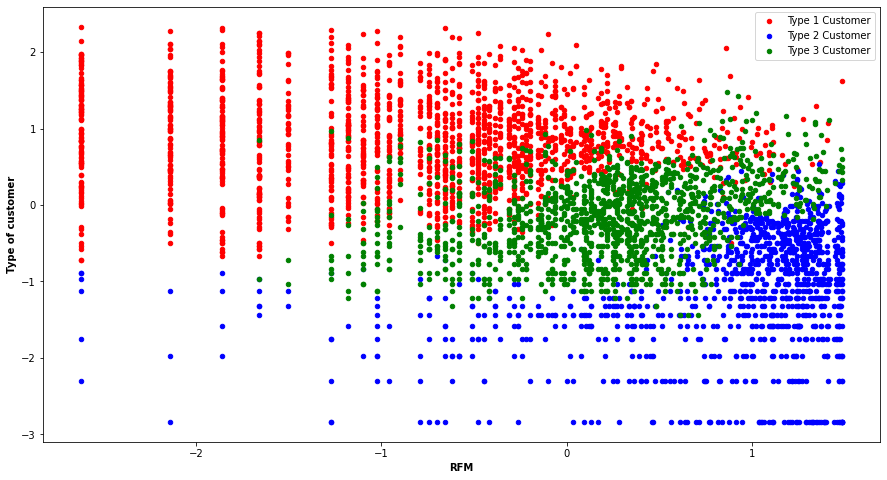

In [280]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Type 1 Customer')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Type 2 Customer')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'green', label = 'Type 3 Customer')
plt.xlabel('RFM',fontweight="bold")
plt.ylabel('Type of customer',fontweight="bold") 
plt.legend()
plt.show()

We can clearly visualize the 3 clusters from the above graph. However there seems to be some overlap among values.

## **Applying DBSCAN algorithm.**

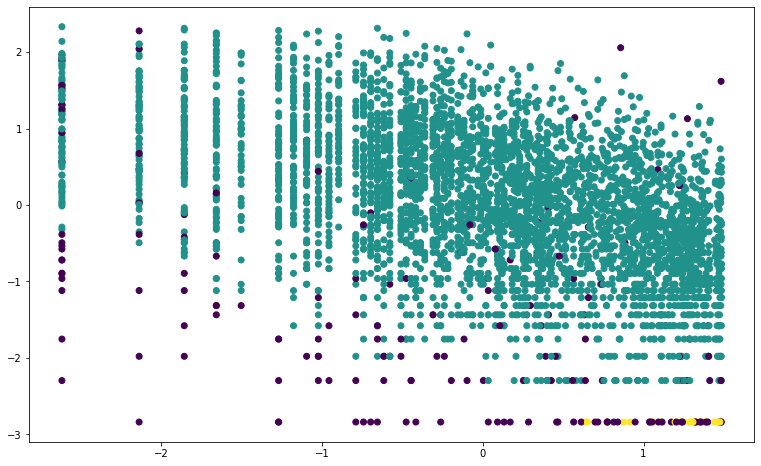

In [281]:
# importing DBSCAN from sklearn.cluster
from sklearn.cluster import DBSCAN
from sklearn import metrics

# fitting the model
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

# plotting the results
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

We can clearly see three clusters forming in the above graph as depicted by colors - teal/cyan, purple and yellow.

In [282]:
# Presenting our final results. Using a prettytable to display them.
# Importing PrettyTable.
from prettytable import PrettyTable 

# Specifying the Column Names while initializing the Table 
results_display = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal Number of clusters"]) 

# Adding the data to be displayed.
results_display.add_row(['1',"K-Means with silhouette score analysis ", "RFM", "2"]) 
results_display.add_row(['2',"K-Means with Elbow method analysis", "RFM", "2"])
results_display.add_row(['3',"Agglomerative Hierarchical Clustering with threshold value 40", "RFM", "3"])
results_display.add_row(['4',"DBSCAN", "RFM", "3"])


print(results_display)

+--------+---------------------------------------------------------------+------+----------------------------+
| SL No. |                           Model_Name                          | Data | Optimal Number of clusters |
+--------+---------------------------------------------------------------+------+----------------------------+
|   1    |            K-Means with silhouette score analysis             | RFM  |             2              |
|   2    |               K-Means with Elbow method analysis              | RFM  |             2              |
|   3    | Agglomerative Hierarchical Clustering with threshold value 40 | RFM  |             3              |
|   4    |                             DBSCAN                            | RFM  |             3              |
+--------+---------------------------------------------------------------+------+----------------------------+


# **Conclusions Drawn :**



*   We saw that most of the customers belong to the United Kingdom which makes sense as it is the country where our business is based out of.
*   We saw that there are around 8872 instances where an order was canceled.
*   We saw that most cancelled products according to our data are REGENCY CAKESTAND 3 TIER, Manual, POSTAGE, JAM MAKING SET WITH JARS	etc.
*   We also saw that most number of cancellations were made by residents of the United Kingdom which makes sense as UK residents have made the most orders as well.
*   We saw that the winter months have the most amount of sales with November, October and December having high number of orders placed compared to the rest of the year. 
*   We also saw that most orders were placed on Thursdays and no orders were placed on Saturdays.
*   We saw that our most selling products in terms of how many separate instances of orders there were (how many customers bought them), are - WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT, etc.
*   WORLD WAR 2 GLIDERS ASSTD DESIGNS	,JUMBO BAG RED RETROSPOT,	ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING HEART T-LIGHT HOLDER, etc. are our most sold products in terms of quantity (no. of units sold).
*   We saw how we can segment our customers depending on our business requirements. We performed Recency, Frequency and Monetary value analysis for our entire customer base and used it to rank our customers.
*   RFM analysis can help in answering many questions with respect to our customers and this can help companies to make marketing strategies for their customers, retaining their at risk of leaving customers and providing recommendations to their customers based on their interest.
* We used the K-means algorithm to segment our customers in various clusters based on some similarities.
* We have used Agglomerative Hierarchical Clustering, silhouette score and elbow method to find optimal no. of clusters.
* The optimal no. of clusters in Agglomerative clustering is 2.
* The optimal no. of clusters in K-means clustering with Elbow method and silhouette score is 2 (max silhouette score = 0.39 for K=2).
* The optimal no. of clusters in Agglomerative Hierarchical Clustering with threshold value 40 is 3.
* The optimal no. of clusters in DBSCAN clustering is 3.







